In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("startup.csv")  

### EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


### unique values for categorical variables

In [6]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

STATE :  3
Florida       16
New York      17
California    17
Name: State, dtype: int64




### Converting categorical to dummy variables

In [7]:
df = pd.get_dummies(df, columns=['State'])

In [8]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [9]:
# Are there any missing values ?
df.isnull().sum()

R&D Spend           0
Administration      0
Marketing Spend     0
Profit              0
State_California    0
State_Florida       0
State_New York      0
dtype: int64

### Checking for duplicates

In [10]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [11]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (50, 7)
After (50, 7)


In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

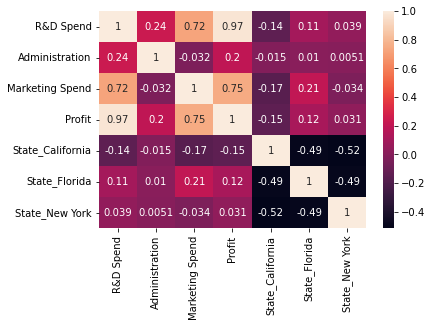

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**The variable '', R&D Spend, Marketing Spend, 'Profit' are having correlation with each other.**


In [14]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 2.1 KB


### Outlier Checks

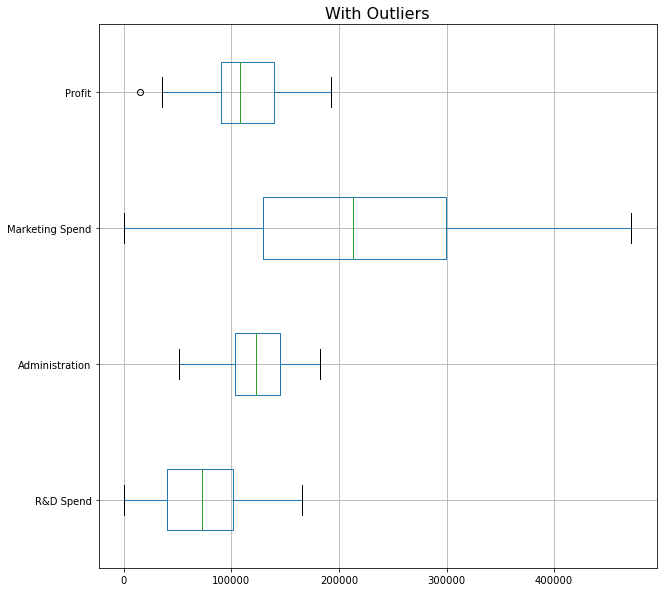

In [16]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

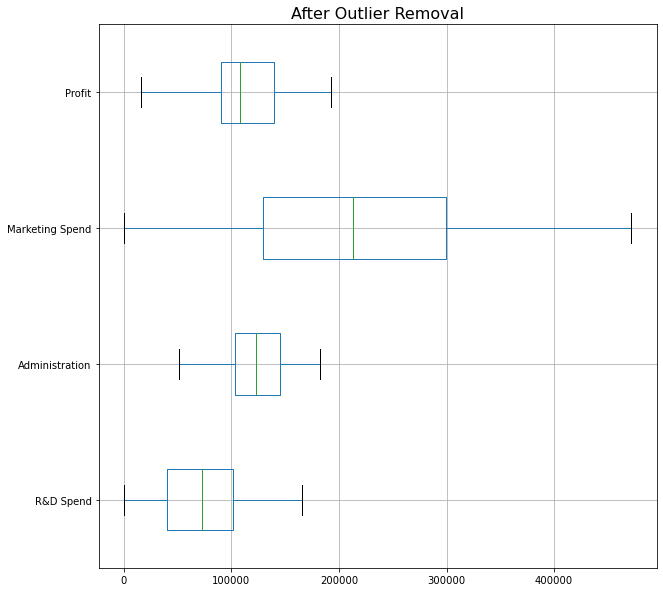

In [19]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

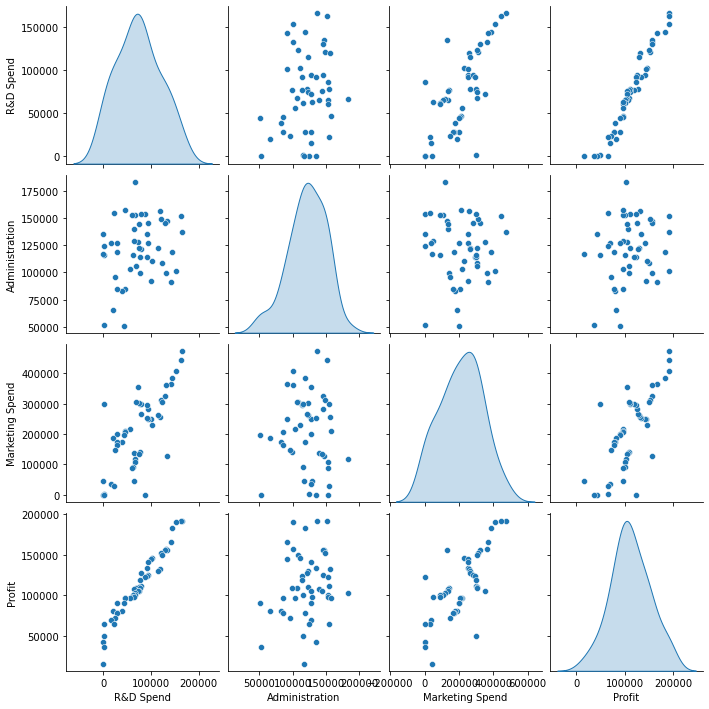

In [20]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Train-Test Split

In [21]:
# Copy all the predictor variables into X dataframe
X = df.drop('Profit', axis=1)

# Copy target into the y dataframe. 
y = df[['Profit']]

In [22]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [23]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [24]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for R&D Spend is 0.7606697880460773
The coefficient for Administration is -0.0011744161992910023
The coefficient for Marketing Spend is 0.0334932388836222
The coefficient for State_California is -333.85301736692554
The coefficient for State_Florida is -128.88638920538835
The coefficient for State_New York is 462.7394065723138


In [26]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 49286.179015090864


In [27]:
# R square on training data
regression_model.score(X_train, y_train)

0.9430566521298653

94% of the variation in the Profit is explained by the predictors in the model for train set

In [28]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9612153224572407

In [29]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

9109.057271762356

In [30]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

8321.884781989404

### Linear Regression using statsmodels

In [31]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
36,28663.76,127056.21,201126.82,0,1,0,90708.19
19,86419.70,153514.11,0.00,0,0,1,122776.86
42,23640.93,96189.63,148001.11,1,0,0,71498.49
49,0.00,116983.80,45173.06,1,0,0,15698.29
26,75328.87,144135.98,134050.07,0,1,0,105733.54


In [32]:
data_train.rename(columns = {"Marketing Spend": "Marketing_Spend", "State_New York": "State_New_York", "R&D Spend": "research"}, 
                              inplace = True) 

data_test.rename(columns = {"Marketing Spend": "Marketing_Spend", "State_New York": "State_New_York", "R&D Spend": "research"}, 
                              inplace = True) 

In [33]:
data_train.columns

Index(['research', 'Administration', 'Marketing_Spend', 'State_California',
       'State_Florida', 'State_New_York', 'Profit'],
      dtype='object')

In [34]:
expr= 'Profit ~ Administration + research + Marketing_Spend + State_Florida + State_New_York + State_California'

In [35]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept           36964.634261
Administration         -0.001174
research                0.760670
Marketing_Spend         0.033493
State_Florida       12192.658364
State_New_York      12784.284160
State_California    11987.691736
dtype: float64

In [36]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     102.7
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.43e-18
Time:                        15:24:19   Log-Likelihood:                -389.83
No. Observations:                  37   AIC:                             791.7
Df Residuals:                      31   BIC:                             801.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.696e+04   7094.352  

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [37]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('Profit',axis=1))-data_train['Profit'])**2)

In [38]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

9109.057271762356

In [39]:
np.sqrt(lm1.mse_resid) #another way

9951.612289650368

In [40]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

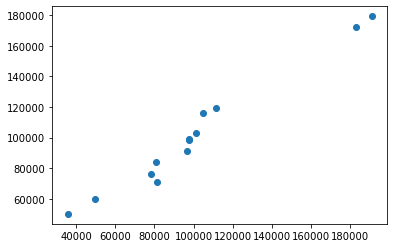

In [41]:
plt.scatter(y_test['Profit'], y_pred)
plt.show()

In [42]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(36964.63) * Intercept + (-0.0) * Administration + (0.76) * research + (0.03) * Marketing_Spend + (12192.66) * State_Florida + (12784.28) * State_New_York + (11987.69) * State_California + 

 # Conclusion

The final Linear Regression equation is  
  
  
<b>Profit = (36964.63) * Intercept + (-0.0) * Administration + (0.76) * research + (0.03) * Marketing_Spend + (12192.66) * State_Florida + (12784.28) * State_New_York + (11987.69) * State_California </b>  
  

